<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Pauta_Certamen_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Certamen 1** - Análisis de Negocios
La empresa Banking_SA está pensando en generar una campaña para contactar a sus clientes y ofrecerles un nuevo seguro asociado a sus productos. Para esto, el Gerente de Analytics ha indicado que para ahorrar presupuesto, su área puede modelar quiénes son los clientes que mayor probabilidad tienen de contratar este nuevo producto. Para eso, le ha pedido a usted, como Analista de Business Analytics que genere un modelo de predicción basado en los datos de la última campaña realizada por el área de Customer Experience (CX).

En aquel entonces, se realizó un modelo de estimación del sueldo de los clientes, ya que la empresa no contaba con esa información, por lo que le indican a usted que esa variable debe ser considerada dentro de su modelo de clasificación, generando un nuevo modelo de regresión del salario de los usuarios a partir de los datos.
Además, se menciona que de esa última campaña, algunos clientes han fallecido, por lo que el sistema ha dejado de manera automática a estos con una edad de -1.

A partir del set de datos "Data_Banking_SA", se le pide lo siguiente:


# 1. Realice un análisis exploratorio de los datos:

In [36]:
#Importar librerias (1 pto)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
#Leer archivo (1 pto)
df = pd.read_csv('/content/Data_Banking_SA.csv')

#####1.a) ¿Cuántas filas y columnas tiene el set de datos?

In [38]:
# Cantidad filas y columnas (2 ptos)
print('Respuesta 1.a) y 1.b):')
print('(Cantidad de Filas, Cantidad de columnas) = ',df.shape)

Respuesta 1.a) y 1.b):
(Cantidad de Filas, Cantidad de columnas) =  (10000, 12)


#####1.b) ¿Qué tipo de dato es cada columna?

In [39]:
#Tipo de datos (1 pto)
print('Respuesta 1.b):')
print(df.dtypes)

Respuesta 1.b):
Nro_Fila                int64
ID_Cliente              int64
Cupo_CLP                int64
Ciudad                 object
Sexo                   object
Edad                    int64
Nivel_Educacional       int64
Cantidad_Productos      int64
Posee_Tarjeta          object
Posee_Propiedad        object
Sueldo_Estimado_CLP     int64
Contrato_Seguro        object
dtype: object


#####1.c) ¿Cuántos datos únicos hay por cada variable?

In [40]:
#Datos únicos
print('Respuesta 1.c):')
df.nunique()

Respuesta 1.c):


Nro_Fila               10000
ID_Cliente             10000
Cupo_CLP                 460
Ciudad                    17
Sexo                       2
Edad                      54
Nivel_Educacional          5
Cantidad_Productos         4
Posee_Tarjeta              2
Posee_Propiedad            2
Sueldo_Estimado_CLP     9966
Contrato_Seguro            2
dtype: int64

#####1.d) ¿Hay datos faltantes?

In [41]:
#Datos faltantes
print('Respuesta 1.d):')
df.isnull().sum()

Respuesta 1.d):


Nro_Fila               0
ID_Cliente             0
Cupo_CLP               0
Ciudad                 0
Sexo                   0
Edad                   0
Nivel_Educacional      0
Cantidad_Productos     0
Posee_Tarjeta          0
Posee_Propiedad        0
Sueldo_Estimado_CLP    0
Contrato_Seguro        0
dtype: int64

#####1.e) Muestre las primeras 10 filas del set de datos

In [42]:
#Primeras 10 filas
print('Respuesta 1.e):')
df.head(10)

Respuesta 1.e):


,Nro_Fila,ID_Cliente,Cupo_CLP,Ciudad,Sexo,Edad,Nivel_Educacional,Cantidad_Productos,Posee_Tarjeta,Posee_Propiedad,Sueldo_Estimado_CLP,Contrato_Seguro
0,1,15634602,3714000,Arica,Hombre,42,2,1,Si,Si,1418859,Si
1,2,15647311,3648000,Arica,Hombre,41,1,1,No,Si,1963883,No
2,3,15619304,3012000,Arica,Hombre,-1,3,3,Si,No,-100,No
3,4,15701354,4194000,Arica,Hombre,39,1,2,No,No,1279910,No
4,5,15737888,5100000,Arica,Hombre,43,2,1,Si,Si,1300027,No
5,6,15574012,3870000,Arica,Mujer,44,3,2,Si,No,2300778,Si
6,7,15592531,4932000,Arica,Mujer,50,4,2,Si,Si,1547085,No
7,8,15656148,2256000,Arica,Hombre,29,4,4,Si,No,1654045,Si
8,9,15792365,3006000,Arica,Mujer,44,4,2,No,Si,1802003,No
9,10,15592389,4104000,Arica,Mujer,27,2,1,Si,Si,1277371,No


#####1.f) Genere un histograma para la variable "Sueldos".



Respuesta 1.e):


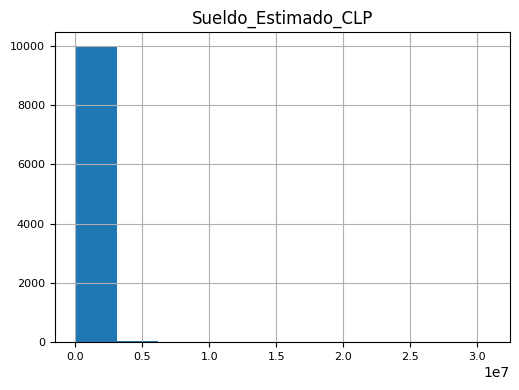

In [43]:
#Histograma variable sueldos
print('Respuesta 1.e):')
df[['Sueldo_Estimado_CLP']].hist(xlabelsize=8,ylabelsize=8,figsize=(10,4),layout=(1,2))
plt.tight_layout()
plt.show()

#####1.g) Genere un gráfico de caja y bigotes para analizar el comportamiento de la variable Sueldo a partir de las variables categóricas.

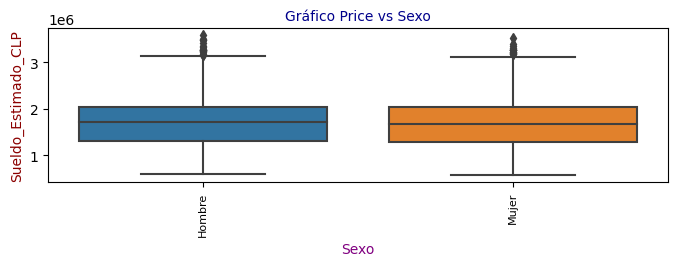

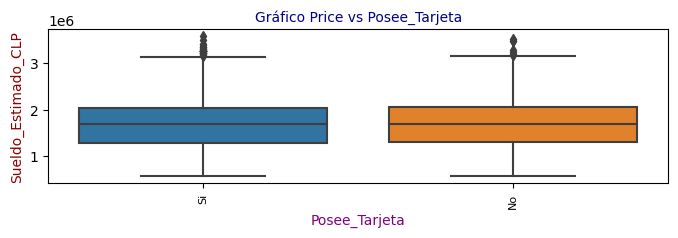

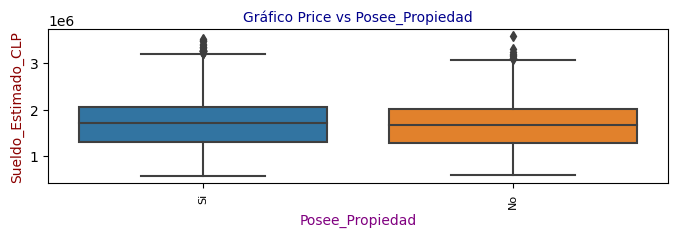

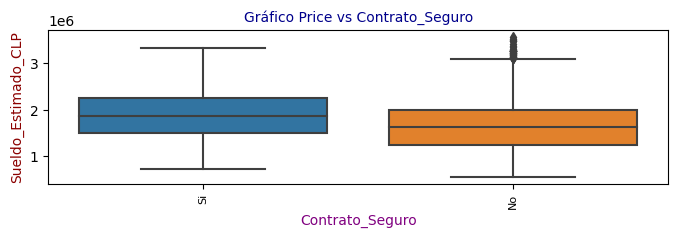

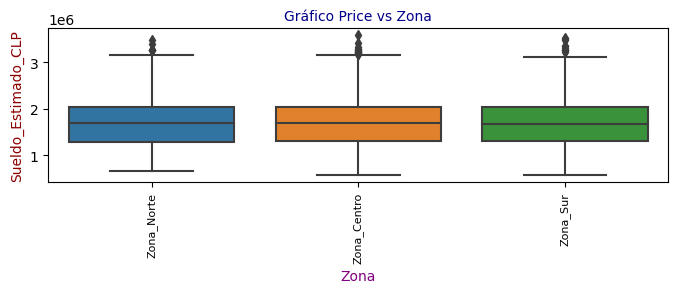

In [34]:
#Boxplot variables categóricas

for i in df.columns:
  if df[i].dtype=='object':
    plt.figure(figsize=(8,2))
    plt.title(f'Gráfico Price vs {i}', fontsize=10, color='darkblue')
    plt.ylabel('Price', fontsize=10, color='darkred');
    plt.xlabel(i, fontsize=10, color='purple');
    plt.xticks(rotation=90, fontsize = 8)
    plt.yticks(fontsize = 10)
    sns.boxplot(x=df[i], y=df['Sueldo_Estimado_CLP'],data=df)
    plt.show()

#####1.h) Muestre un análisis estadístico de las variables cuantitativas ¿Hay datos extremos?

In [44]:
#Datos estadísticos: edad con -1
df.describe()

,Nro_Fila,ID_Cliente,Cupo_CLP,Edad,Nivel_Educacional,Cantidad_Productos,Sueldo_Estimado_CLP
count,10000.00000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,1.569094e+07,3.903173e+06,38.464900,3.053600,1.530200,1.702692e+06
std,2886.89568,7.193619e+04,5.799198e+05,9.717685,1.368033,0.581654,6.705839e+05
min,1.00000,1.556570e+07,2.100000e+06,-1.000000,1.000000,1.000000,-1.000000e+02
25%,2500.75000,1.562853e+07,3.504000e+06,32.000000,2.000000,1.000000,1.296500e+06
50%,5000.50000,1.569074e+07,3.912000e+06,37.000000,3.000000,1.000000,1.690148e+06
75%,7500.25000,1.575323e+07,4.308000e+06,44.000000,4.000000,2.000000,2.041137e+06
max,10000.00000,1.581569e+07,5.100000e+06,70.000000,5.000000,4.000000,3.089713e+07


In [45]:
#Eliminamos edad negativa
df.drop(df[df.Edad<0].index, inplace=True)

In [46]:
#Revisamos que las filas con edad<0 ya no estén en el dataframe:
df['Edad'].min()

18

In [47]:
#Eliminamos sueldos altos
df.drop(df[df.Sueldo_Estimado_CLP>1e+07].index, inplace=True)

In [48]:
#Revisamos el sueldo máximo
df['Sueldo_Estimado_CLP'].max()

3574565

#####1.i) ¿Qué columnas eliminaría para un modelo de regresión lineal?

In [49]:
#Mostramos las columnas:
list(df.columns)

['Nro_Fila',
 'ID_Cliente',
 'Cupo_CLP',
 'Ciudad',
 'Sexo',
 'Edad',
 'Nivel_Educacional',
 'Cantidad_Productos',
 'Posee_Tarjeta',
 'Posee_Propiedad',
 'Sueldo_Estimado_CLP',
 'Contrato_Seguro']

In [50]:
#Eliminamos: 'Nro_Fila', 'ID_Cliente':
df=df.drop(['Nro_Fila'], axis=1)
df=df.drop(['ID_Cliente'], axis=1)

In [51]:
#Dataframe sin columnas quitadas
list(df.columns)

['Cupo_CLP',
 'Ciudad',
 'Sexo',
 'Edad',
 'Nivel_Educacional',
 'Cantidad_Productos',
 'Posee_Tarjeta',
 'Posee_Propiedad',
 'Sueldo_Estimado_CLP',
 'Contrato_Seguro']

#####1.j) El Gerente de Operaciones le indica que según su criterio experto, la variable Ciudad no debiese ser considerada como tal, sino que debe agrupar las ciudades por Zona de la siguiente manera: Zona_Norte, Zona_Centro y Zona_Sur. Realice este ajuste dentro de su dataframe.

In [52]:
df['Zona'] = df['Ciudad']

In [53]:
df['Zona'].unique()

array(['Arica', 'Iquique', 'Antofagasta', 'La Serena', 'Coquimbo',
       'Vina del mar', 'Valparaiso', 'Rancagua', 'Curico', 'Chillan',
       'Concepcion', 'Temuco', 'Osorno', 'Valdivia', 'Puerto Montt',
       'Punta Arenas', 'Santiago'], dtype=object)

In [54]:
#Revisar si puedo modificarlo así:
#Zona_Norte = ['Arica', 'Iquique', 'Antofagasta', 'La Serena', 'Coquimbo']
#Zona_Centro = ['Vina del mar', 'Valparaiso', 'Rancagua', 'Curico','Santiago']
#Zona_Sur = ['Chillan', 'Concepcion', 'Temuco', 'Osorno', 'Valdivia', 'Puerto Montt','Punta Arenas']

In [23]:
df['Zona'] = df['Zona'].replace({'Arica':'Zona_Norte','Iquique':'Zona_Norte','Antofagasta':'Zona_Norte'
                                ,'La Serena':'Zona_Norte','Coquimbo': 'Zona_Norte'
                                ,'Vina del mar':'Zona_Centro','Valparaiso':'Zona_Centro'
                                ,'Santiago':'Zona_Centro','Rancagua':'Zona_Centro','Curico':'Zona_Centro'
                                ,'Chillan':'Zona_Sur','Concepcion':'Zona_Sur','Temuco':'Zona_Sur','Osorno':'Zona_Sur'
                                ,'Valdivia':'Zona_Sur','Puerto Montt':'Zona_Sur','Punta Arenas':'Zona_Sur'})

In [24]:
df['Zona'].unique()

array(['Zona_Norte', 'Zona_Centro', 'Zona_Sur'], dtype=object)

In [25]:
df=df.drop(['Ciudad'], axis=1)

<ipython-input-31-43af1799ea2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype='bool')
<ipython-input-31-43af1799ea2f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask, annot_kws={"fontsize":20})


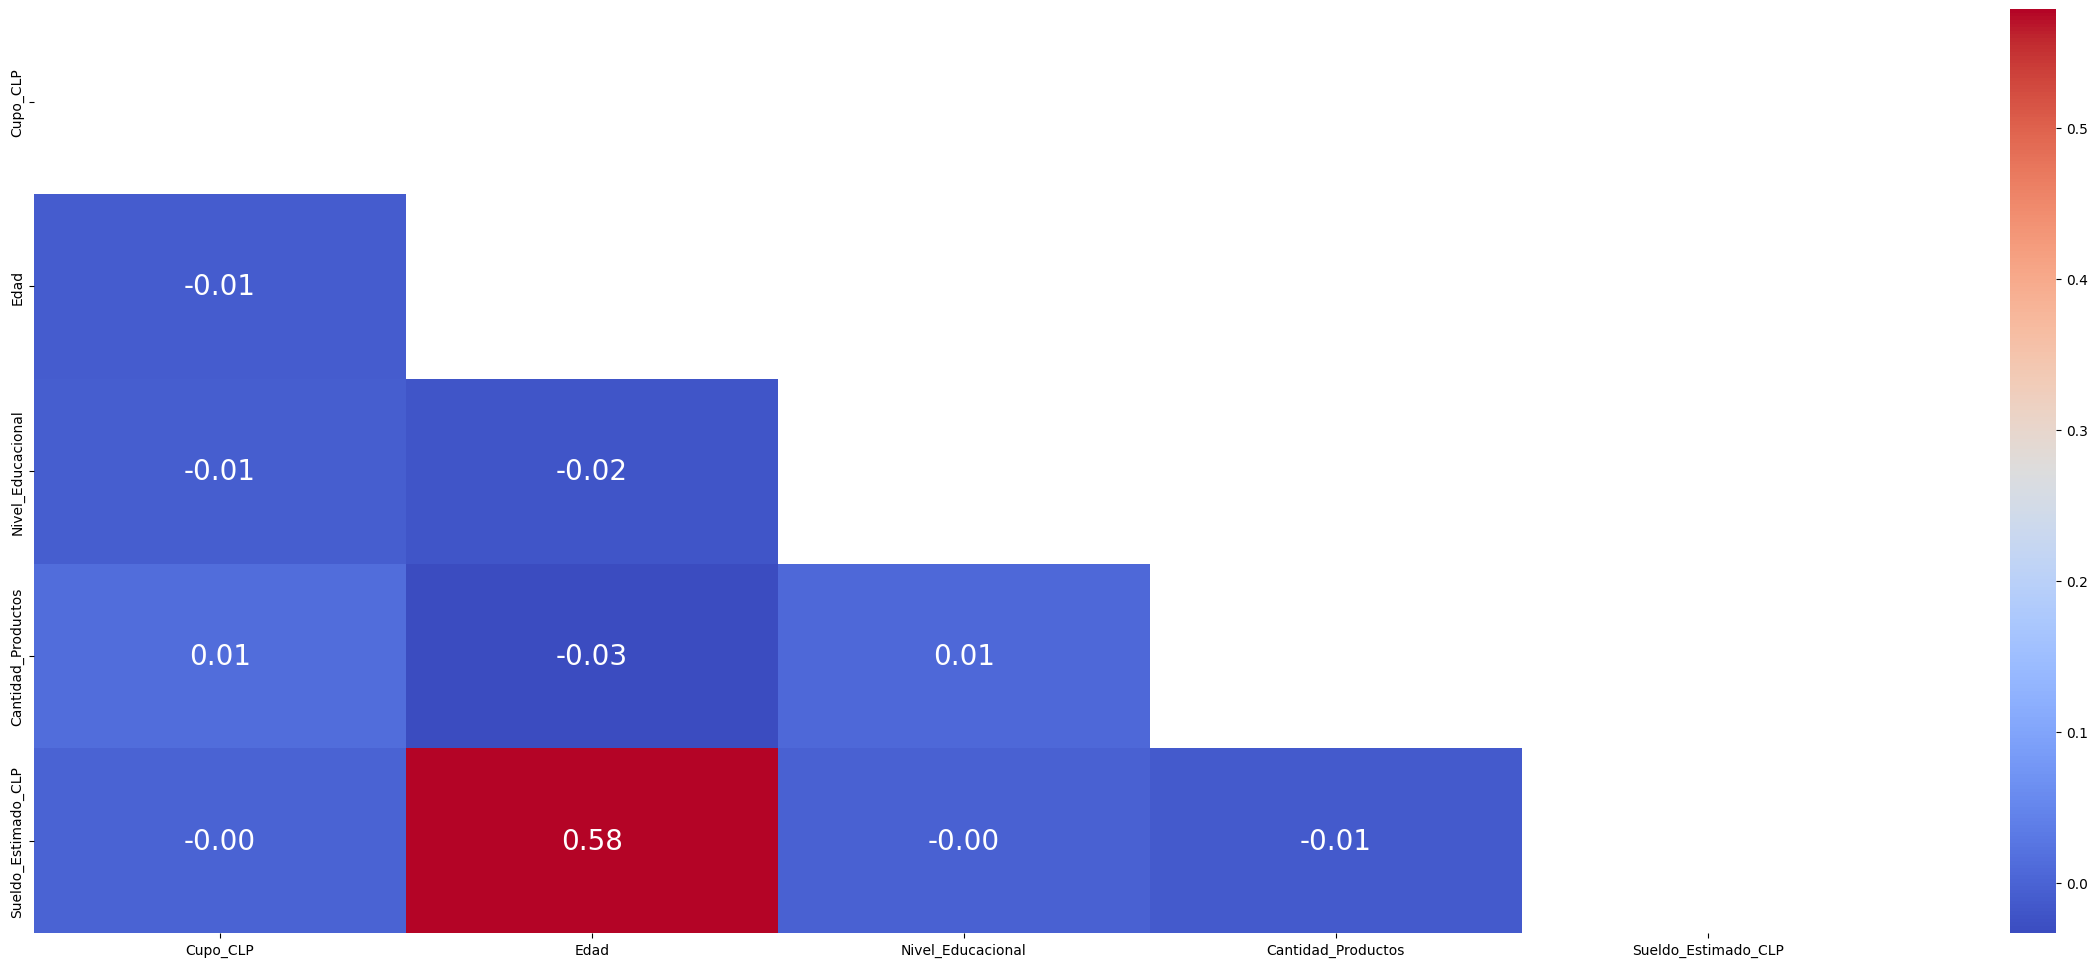

In [31]:
#Matriz de correlación
mask = np.zeros_like(df.corr(), dtype='bool')
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(30, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask, annot_kws={"fontsize":20})
plt.show()

2. Genere un modelo de Regresión Lineal Simple para predecir la variable Sueldo en función de la edad de los clientes.

    2.a) ¿Cuáles son los coeficientes de la regresión?

    2.b) ¿Cuál es el Error Cuadrático Medio de la regresión?
    
    2.b) A partir de esta regresión, ¿cuál será el sueldo de una persona que tiene 20, 30 y 40 años?


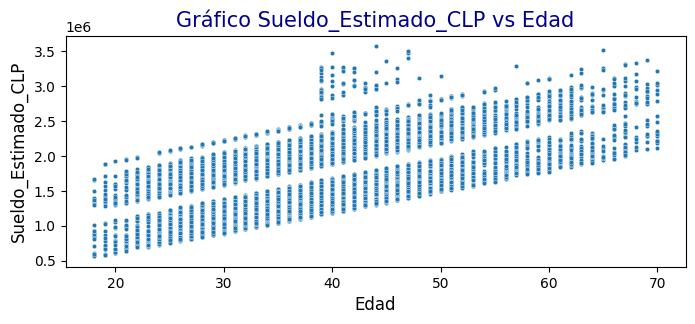

In [35]:
#Gráfico Sueldo_Estimado_CLP vs Edad
plt.figure(figsize=(8,3))
plt.title('Gráfico Sueldo_Estimado_CLP vs Edad', fontsize=15, color='darkblue')
plt.ylabel('Sueldo_Estimado_CLP', fontsize=12);
plt.xlabel('Edad', fontsize=12);
sns.scatterplot(data=df, x='Edad', y='Sueldo_Estimado_CLP', s=10, palette='bright')
plt.show()

In [27]:
#Importamos librería para regresión lineal:
import statsmodels.formula.api as smf

In [28]:
#Regresión Lineal Simple
rls=smf.ols(formula='Sueldo_Estimado_CLP~Edad',data=df).fit()

In [29]:
#Resumen de la regresión
rls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Sueldo_Estimado_CLP   R-squared:                       0.335
Model:                             OLS   Adj. R-squared:                  0.335
Method:                  Least Squares   F-statistic:                     5024.
Date:                 Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                         10:52:46   Log-Likelihood:            -1.4308e+05
No. Observations:                 9988   AIC:                         2.862e+05
Df Residuals:                     9986   BIC:                         2.862e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.547e+05   1.66e+04     33.408      0.000    5.22e+05    5.87e+05
Edad        2.966e+04    418.484     70.879      0.000    2.88e+04    3.05e+04
==============================================================================
Omnibus:                     1110.762   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.465
Skew:                           0.331   Prob(JB):                    2.29e-101
Kurtosis:                       2.178   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
df.columns

Index(['Cupo_CLP', 'Ciudad', 'Sexo', 'Edad', 'Nivel_Educacional',
       'Cantidad_Productos', 'Posee_Tarjeta', 'Posee_Propiedad',
       'Sueldo_Estimado_CLP', 'Contrato_Seguro', 'Zona'],
      dtype='object')

In [110]:
X=df[['Edad']]
Y=df[['Sueldo_Estimado_CLP']]

In [111]:
rls = LinearRegression()

In [112]:
rls.fit(X, Y)

LinearRegression()

In [113]:
rls.coef_

array([[29661.59825656]])

In [114]:
rls.intercept_

array([554740.64874534])

In [116]:
rls.predict(Y)

ValueError: ignored

3. Particione el set de datos con un testeo del 25% para generar un modelo de Regresión Lineal Múltiple, incluyendo todas las variables que dejó en su dataset ajustado a partir de las conclusiones del Ánalisis Exploratorio de Datos (EDA).

    3.a) Transforme las variables categóricas a Dummies.
    
    3.b) ¿Cuáles son los coeficientes de esta regresión?
  
    3.c) Genere un gráfico que muestre el Valor-P de cada uno de los estimadores. ¿Qué variables no son significativas?
    
    3.d) ¿Cuál es el Error Cuadrático Medio del set de entrenamiento?

    3.e) ¿Cuál es el Error Cuadrático Medio del set de testeo?
